## Handling Numerical Columns

In [42]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report


- Reading categorically cleaned data 

In [2]:
data_ = pd.read_csv('cats_data_cleaned.csv')
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29995 entries, 0 to 29994
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          26989 non-null  float64
 1   normalized-losses  21528 non-null  float64
 2   make               29995 non-null  object 
 3   fuel-type          29995 non-null  object 
 4   aspiration         29995 non-null  object 
 5   num-of-doors       29995 non-null  object 
 6   body-style         29995 non-null  object 
 7   drive-wheels       29995 non-null  object 
 8   engine-location    29995 non-null  object 
 9   wheel-base         26975 non-null  float64
 10  length             26963 non-null  float64
 11  width              27096 non-null  float64
 12  height             26982 non-null  float64
 13  curb-weight        27012 non-null  float64
 14  engine-type        29995 non-null  object 
 15  num-of-cylinders   29995 non-null  object 
 16  engine-size        269

In [3]:
numerical_col = data_.select_dtypes(include='number')
numerical_col

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,88.6,168.8,64.1,NaN,2548.0,NaN,3.47,2.68,9.0,111.0,NaN,21.0,27.0,13495.0
1,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,NaN,21.0,27.0,16500.0
2,1.0,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,NaN,3.47,9.0,154.0,NaN,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,NaN,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,NaN,NaN,54.3,2824.0,136.0,NaN,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,3.0,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,9.4,135.0,NaN,NaN,NaN,15645.0
29991,NaN,168.0,94.5,168.7,64.0,52.6,2300.0,98.0,3.24,NaN,9.4,112.0,6600.0,26.0,29.0,9538.0
29992,1.0,113.0,93.1,166.8,64.2,54.1,1945.0,91.0,3.03,NaN,9.0,68.0,5000.0,31.0,38.0,6695.0
29993,3.0,186.0,94.5,168.9,NaN,50.2,2778.0,151.0,3.94,NaN,9.5,143.0,5500.0,19.0,27.0,22018.0


In [ ]:
for col in numerical_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_[col].dropna(), kde=True, color='orchid')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Focusing on columns which have great impact on my price
- For that I need to get correlations 
- For correlations I need to have heatmap

In [5]:
data_.select_dtypes(include='object').value_counts()

make         fuel-type  aspiration  num-of-doors  body-style  drive-wheels  engine-location  engine-type  num-of-cylinders  fuel-system
honda        gas        std         two           hatchback   fwd           front            ohc          four              1bbl           670
toyota       gas        std         four          sedan       fwd           front            ohc          four              2bbl           629
bmw          gas        std         four          sedan       rwd           front            ohc          six               mpfi           521
mitsubishi   gas        turbo       two           hatchback   fwd           front            ohc          four              spdi           487
mazda        gas        std         two           hatchback   fwd           front            ohc          four              2bbl           458
                                                                                                                                          ... 
alfa-r

## Encoding
- using label encoding because my models are tree based. 

In [6]:
cat_col_for_encoding = data_.select_dtypes(include='object')
cat_col_for_encoding=cat_col_for_encoding.columns

In [7]:
data_encoded = pd.get_dummies(data_)
data_encoded

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,NaN,88.6,168.8,64.1,NaN,2548.0,NaN,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,NaN,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,NaN,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.0,99.4,NaN,NaN,54.3,2824.0,136.0,NaN,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,3.0,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,...,False,True,False,False,False,False,False,True,False,False
29991,NaN,168.0,94.5,168.7,64.0,52.6,2300.0,98.0,3.24,NaN,...,False,False,False,False,False,False,False,True,False,False
29992,1.0,113.0,93.1,166.8,64.2,54.1,1945.0,91.0,3.03,NaN,...,False,False,False,True,False,False,False,False,False,False
29993,3.0,186.0,94.5,168.9,NaN,50.2,2778.0,151.0,3.94,NaN,...,False,False,False,False,False,False,False,True,False,False


## Selecting Features

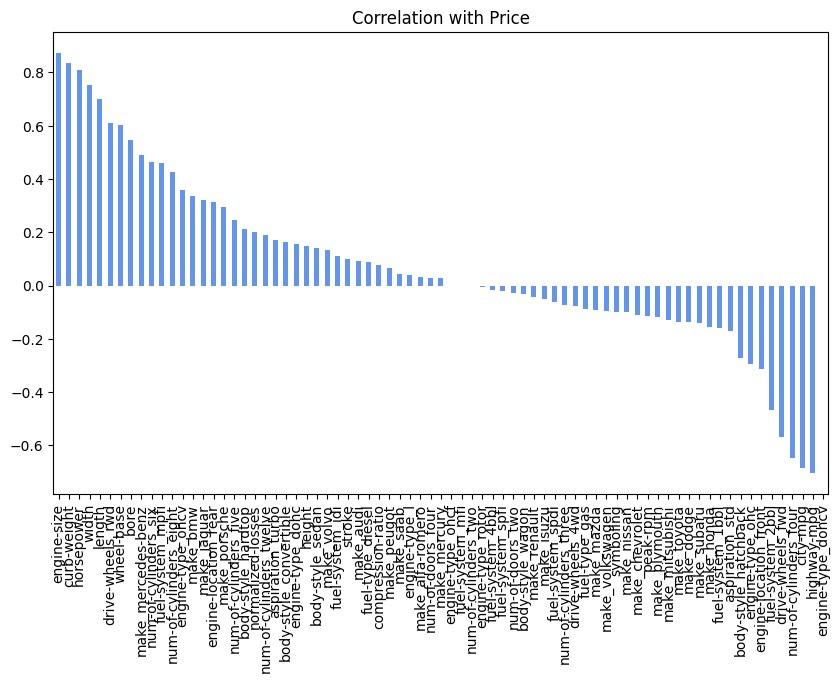

In [8]:
corr_matrix = data_encoded.corr()
corr_with_price = corr_matrix['price']
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.show()

plt.figure(figsize=(10, 6))
corr_with_price.drop('price').sort_values(ascending=False).plot(kind='bar', color='cornflowerblue')
plt.title('Correlation with Price')
plt.show()



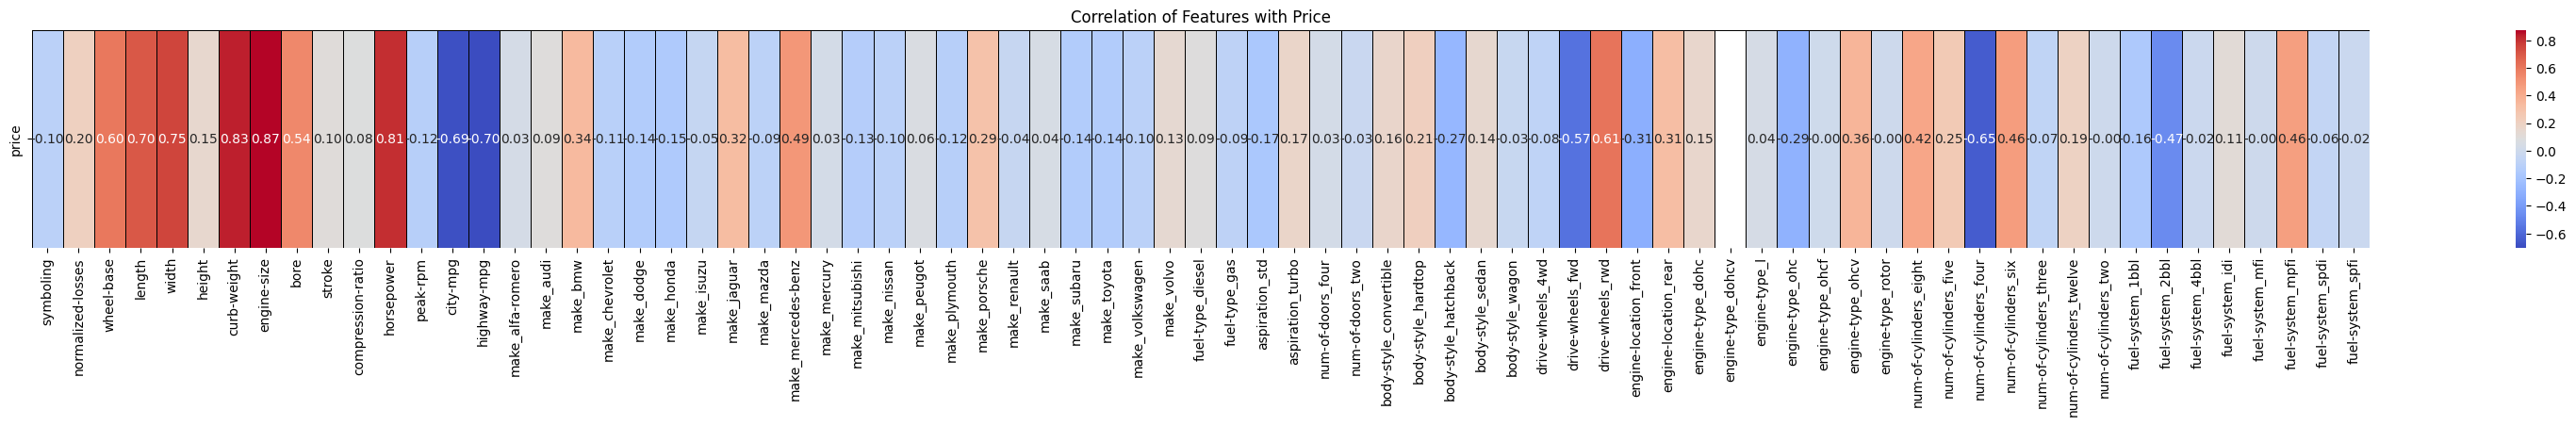

In [9]:
corr_with_price = corr_matrix['price'].drop('price')  
corr_with_price_df = corr_with_price.to_frame()
plt.figure(figsize=(40, 3))
sns.heatmap(corr_with_price_df.T, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='black')

plt.title("Correlation of Features with Price")
plt.show()

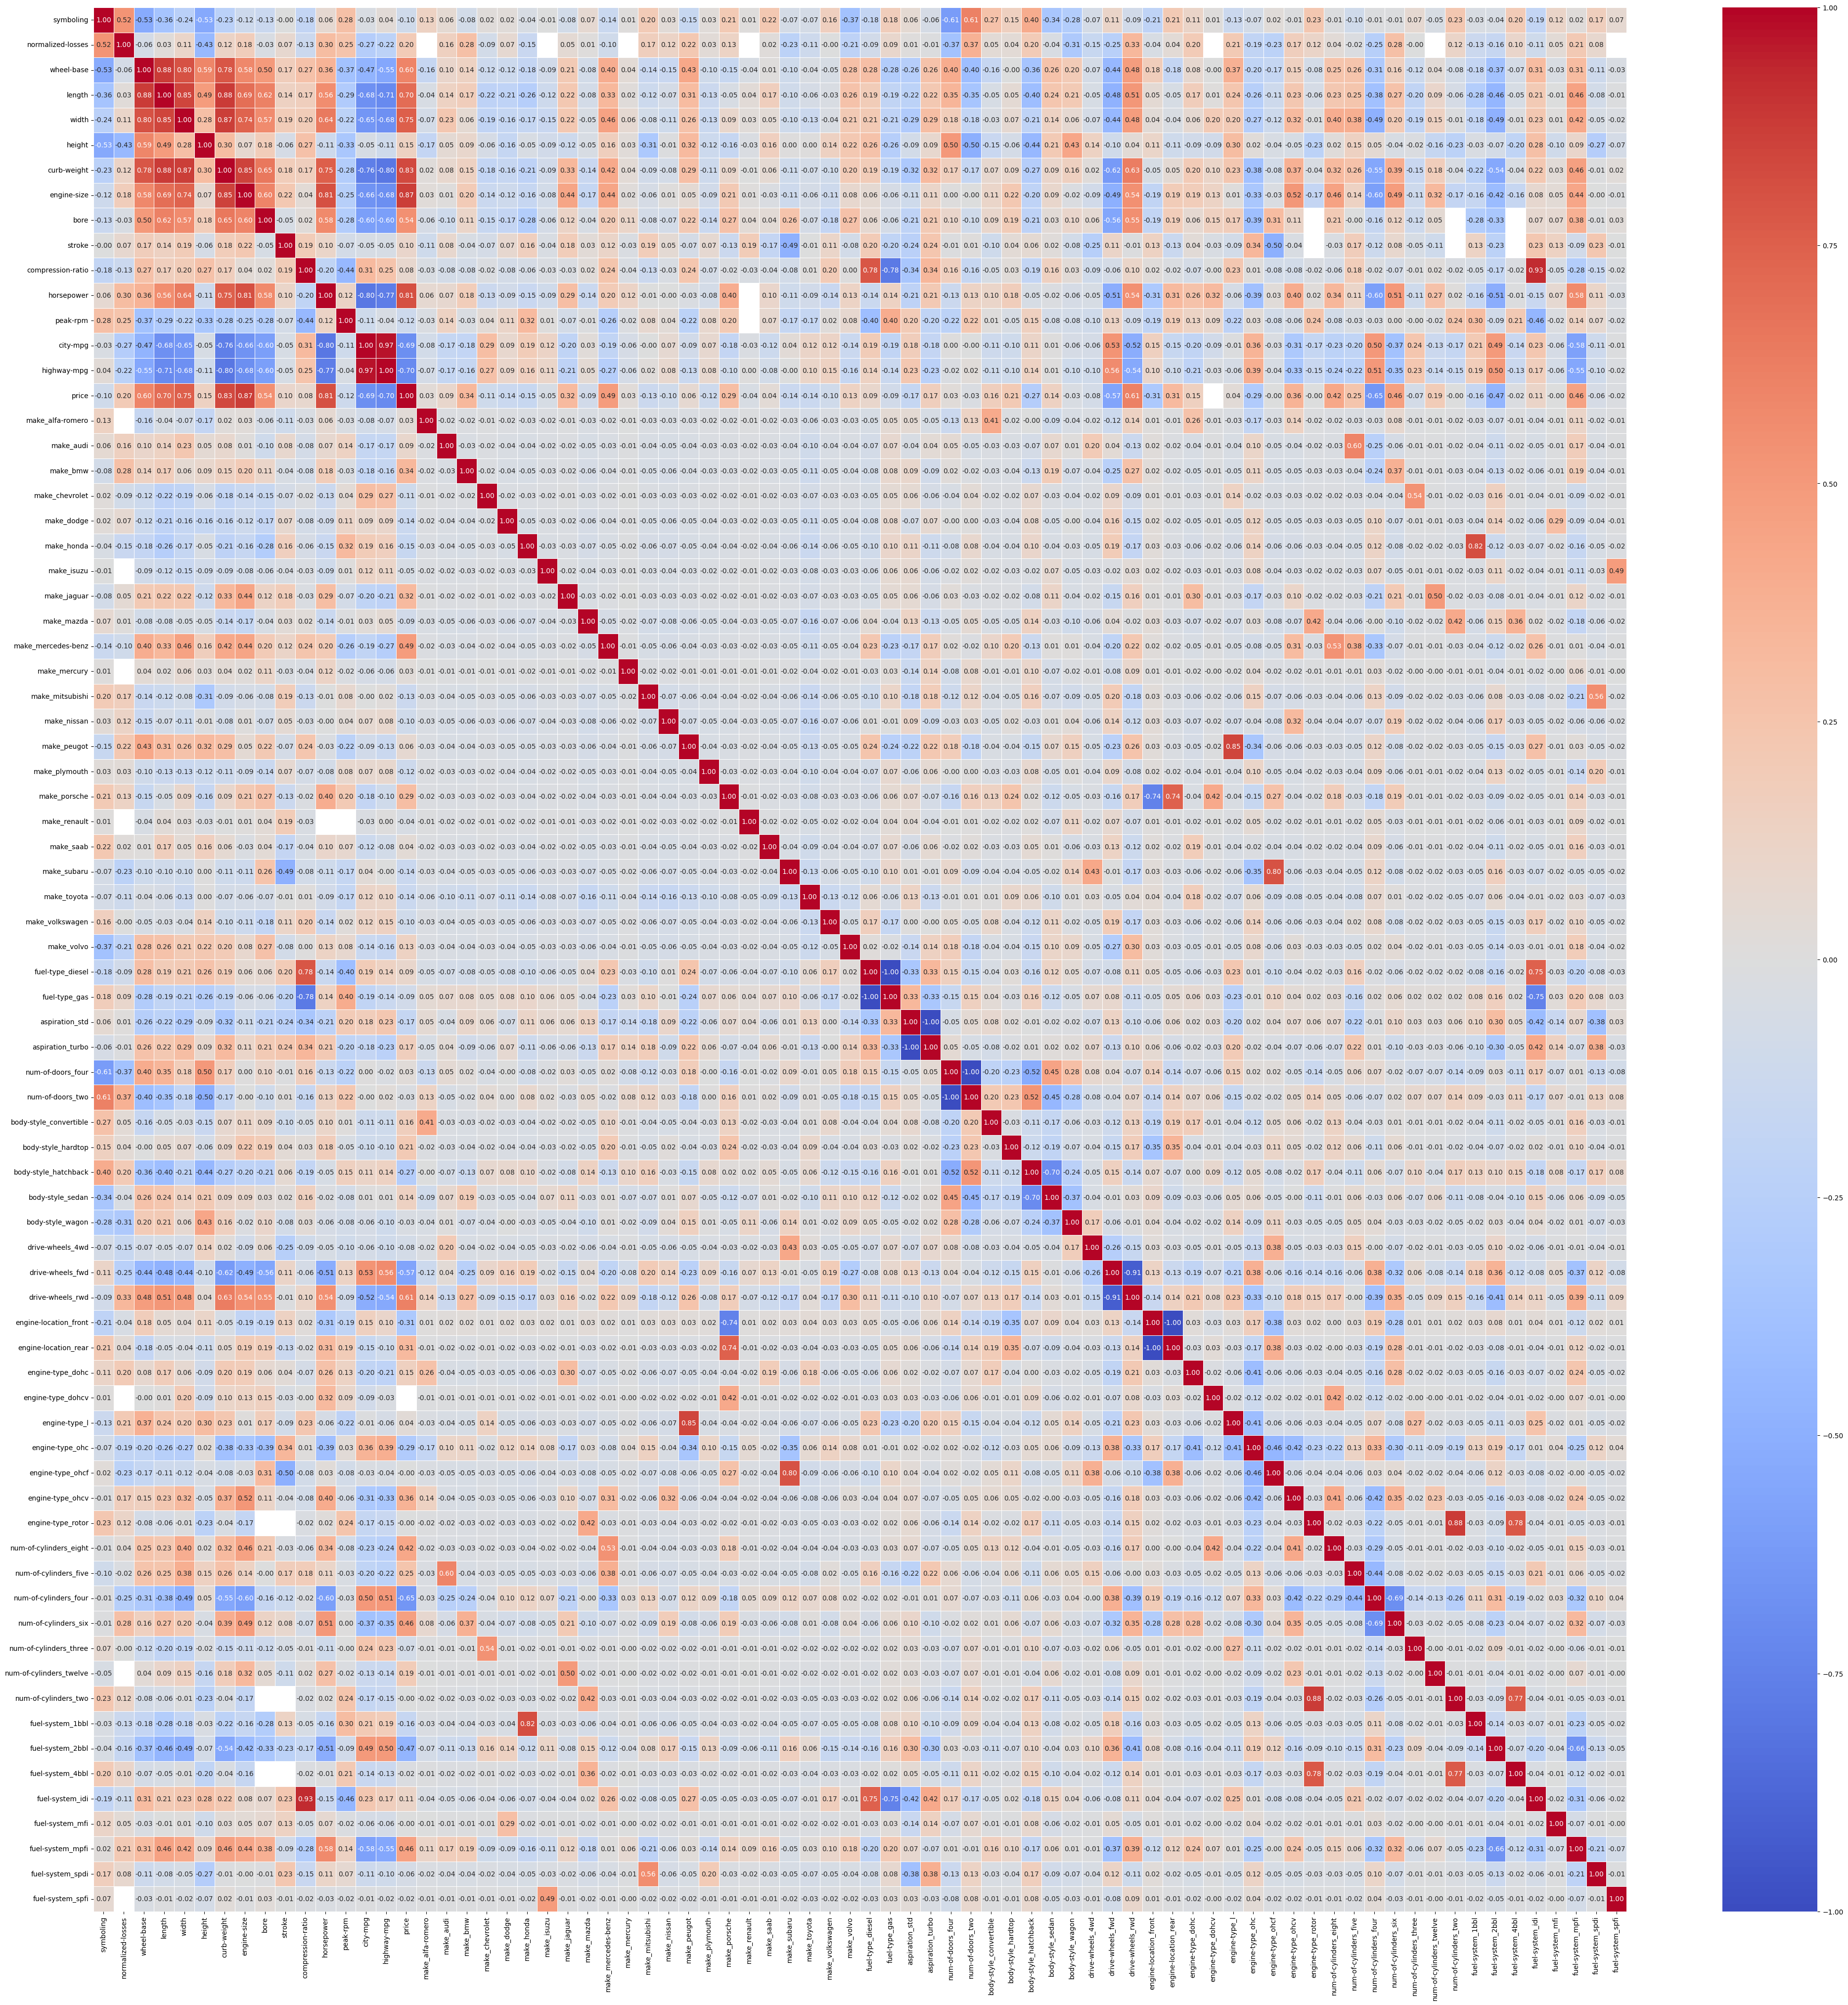

In [68]:
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [10]:
corr_with_target = data_encoded.corr()['price'].abs()
selected_features = corr_with_target[corr_with_target > 0.3].index.tolist()



In [11]:
selected_features

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'price',
 'make_bmw',
 'make_jaguar',
 'make_mercedes-benz',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_front',
 'engine-location_rear',
 'engine-type_ohcv',
 'num-of-cylinders_eight',
 'num-of-cylinders_four',
 'num-of-cylinders_six',
 'fuel-system_2bbl',
 'fuel-system_mpfi']

## Imputing for nulls in Numeric data

In [31]:
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(data_encoded[selected_features])

In [29]:
# Convert to DataFrame with column names and index
imputed_df = pd.DataFrame(imputed_data, columns=selected_features, index=data_encoded.index)

# Check the DataFrame
print(imputed_df.head())


   wheel-base  length  width  curb-weight  engine-size  bore  horsepower  \
0        88.6   168.8   64.1       2548.0        130.0  3.47       111.0   
1        88.6   168.8   64.1       2548.0        130.0  3.47       111.0   
2        94.5   171.2   65.5       2823.0        152.0  2.68       154.0   
3        99.8   176.6   66.2       2337.0        109.0  3.19       102.0   
4        99.4   176.6   66.4       2824.0        136.0  3.19       115.0   

   city-mpg  highway-mpg    price  ...  drive-wheels_fwd  drive-wheels_rwd  \
0      21.0         27.0  13495.0  ...               0.0               1.0   
1      21.0         27.0  16500.0  ...               0.0               1.0   
2      19.0         26.0  16500.0  ...               0.0               1.0   
3      24.0         30.0  13950.0  ...               1.0               0.0   
4      18.0         22.0  17450.0  ...               0.0               0.0   

   engine-location_front  engine-location_rear  engine-type_ohcv  \
0     

In [ ]:
for col in selected_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(imputed_df[col].dropna(), kde=True, color='orchid')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [47]:
data = imputed_df  

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_dt = r2_score(y_test, y_pred_dt)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the results
print(f"Decision Tree - MSE: {mse_dt}, R2: {r2_dt}")
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

Decision Tree - MSE: 216047.94700810735, R2: 0.9967441326096554
Linear Regression - MSE: 6167293.005773001, R2: 0.9070581856376413


In [40]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


Random Forest - MSE: 214321.36337854975, R2: 0.9967701524233775
